In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv(r"C:\Users\DEEPESH.G\Downloads\Housing.csv")

# Encode binary categorical columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# Encode 'furnishingstatus' using LabelEncoder
le = LabelEncoder()
data['furnishingstatus'] = le.fit_transform(data['furnishingstatus'])

print(data.head())



      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [3]:
# independent and dependent features

X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values # target variable

print(X)
print(Y)

[[13300000     7420        4 ...        1        2        1]
 [12250000     8960        4 ...        1        3        0]
 [12250000     9960        3 ...        0        2        1]
 ...
 [ 1750000     3620        2 ...        0        0        0]
 [ 1750000     2910        3 ...        0        0        0]
 [ 1750000     3850        3 ...        0        0        0]]
[ 7420  8960  9960  7500  7420  7500  8580 16200  8100  5750 13200  6000
  6550  3500  7800  6000  6600  8500  4600  6420  4320  7155  8050  4560
  8800  6540  6000  8875  7950  5500  7475  7000  4880  5960  6840  7000
  7482  9000  6000  6000  6550  6360  6480  6000  6000  6000  6000  6600
  4300  7440  7440  6325  6000  5150  6000  6000 11440  9000  7680  6000
  6000  8880  6240  6360 11175  8880 13200  7700  6000 12090  4000  6000
  5020  6600  4040  4260  6420  6500  5700  6000  6000  4000 10500  6000
  3760  8250  6670  3960  7410  8580  5000  6750  4800  7200  6000  4100
  9000  6400  6600  6000  6600  5500  5500  

In [4]:
# Splitting the dataset into training and testing sets

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_Train)
print(Y_Train)



[[3143000    4500       3 ...       1       0       0]
 [3500000    3990       3 ...       0       0       0]
 [4690000    4320       3 ...       0       0       1]
 ...
 [9800000    5750       3 ...       1       1       1]
 [3710000    3600       3 ...       0       1       0]
 [5040000    6600       3 ...       0       0       1]]
[ 4500  3990  4320  1905  3510  2400  4960  6525  3650  6750  6000  3960
  3800  4350  3000  5320  5850  7600  6000 10269  5400  4120  7980  3850
  6840  3630  4600  8080  2550  3970  6000  4040  6000  5300  4800  4600
  7420  2910  7200  3640  3750  7500  6660  4080  4520  6000  6615  6254
  8050  6000  4646  4320  3185  4500  7800  5500  4050  2650  4990  8100
  3630 11175  4840  3520  6540  4000  4120  6930  3792  3520  2400  1836
  6210  3360  4775  3510  4950  8250  7350  6325  4410 10700  6900  3090
  4370  6710  5450  5880  6360  3000  2145 11410  3635  4360  3500  3120
  5600  7200  5450  3240  5948  5000  5136  6000  6800  3460  3520  7000
  3090 

In [5]:
# Training the Linear Regression model on the training set 
model = LinearRegression()
model.fit(X_Train, Y_Train)

intercept, coefficients = model.intercept_, model.coef_
# intercept and the slope of the regression line
print('Slope:', model.coef_)
print('Y-intercept:', model.intercept_)

Slope: [ 3.63989656e-16  1.00000000e+00  3.21469197e-14 -3.57247326e-14
 -7.24734942e-16  8.69182113e-14 -1.94660640e-14 -2.08731144e-14
 -3.99828587e-14 -3.03138591e-14 -3.28458506e-14 -5.29749313e-14]
Y-intercept: -1.737134880386293e-09


In [6]:
# Predicting the Test set results
Y_Pred = model.predict(X_Test)
print(Y_Pred)

[ 4000.  9620.  3460. 13200.  3660.  6350.  3850.  3480.  3512.  9000.
  6000.  3960.  3450.  6060.  5985.  2430.  4900.  6020.  3100.  4500.
  8150.  6450.  5000.  1700.  6420.  3150.  7000.  5680.  3300.  6420.
  4400.  2275.  8400.  4040.  3120.  6440.  6000.  3036.  3450.  2175.
  8500.  5900.  5800.  5495.  3520.  6000.  4160.  4040.  4046.  5700.
  4840.  9667.  1650.  3850.  5880.  5720.  8250.  4640.  3600.  7000.
 12900.  6600.  2135.  6000.  2640.  2817.  7155.  4410.  4500.  6300.
  2145.  5500.  3600.  4260.  3780.  2870.  3420.  8580.  2910.  4000.
  2145.  7686.  4510.  7152.  4600.  3240.  3420.  5800.  3150.  4075.
  7424.  9000.  3640.  3150.  2145.  8960.  2160.  6550.  7770.  8400.
 10500.  3480.  2787.  3000.  6420.  5200.  6060.  4500.  6100.  3620.
  4000.  3040.  3600.  9860.  3968.  3840.  9800.  3640.  3520. 13200.
  2700.  4300.  4500.  4995.  3069.  4352.  8880. 12944.  7160.  3600.
  6650.  4050.  3000.  3640.  5360. 16200.  5960.  2000.  5300.  3000.
  3400

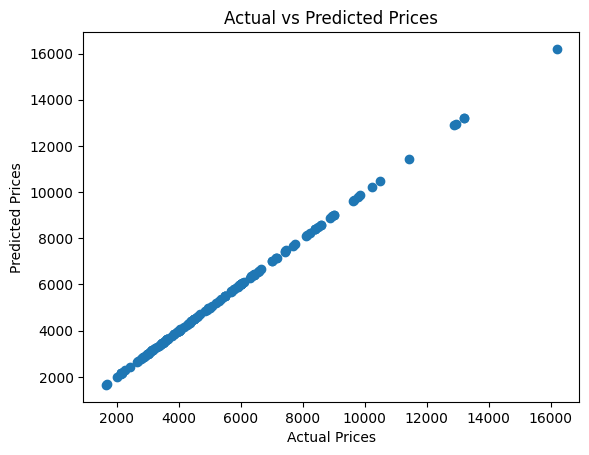

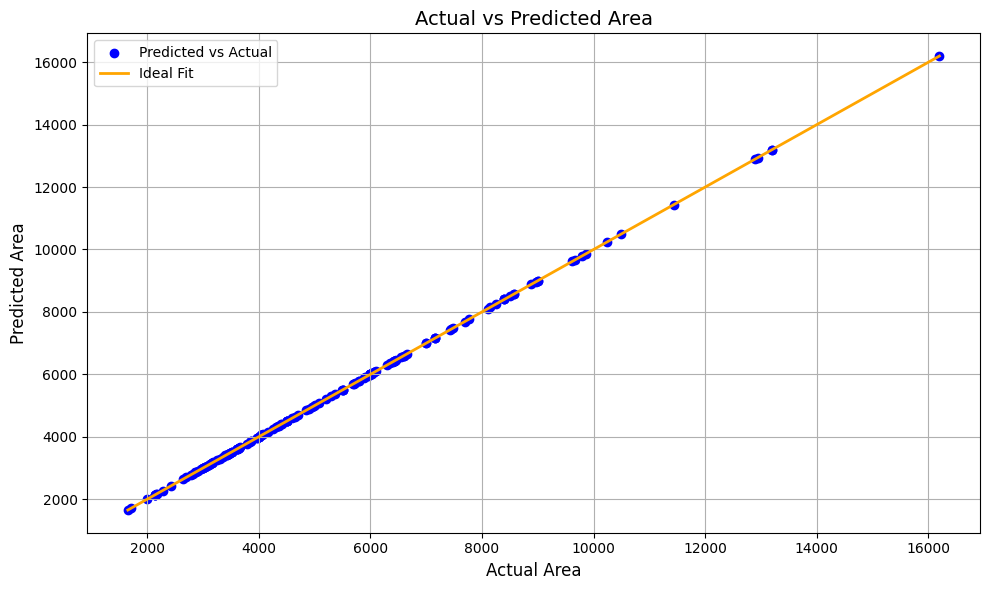

In [7]:

# Plotting the results
plt.scatter(Y_Test, Y_Pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(Y_Test, Y_Pred, color='blue', marker='o', label='Predicted vs Actual')

# Ideal fit line (diagonal)
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], color='orange', linewidth=2, label='Ideal Fit')

# Labels and title
plt.title('Actual vs Predicted Area', fontsize=14)
plt.xlabel('Actual Area', fontsize=12)
plt.ylabel('Predicted Area', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Accuracy:",r2_score(Y_Test, Y_Pred)) # 100% accuracy


Accuracy: 1.0
